# Demand Forecasting for a Retail Store

In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date

In [8]:
df =pd.read_csv('Retail_Dataset2.csv',engine='python')
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [9]:
print('shape of dataset',np.shape(df))
print ('Null to Dataset Ratio in Dates: ',df.isnull().sum()[3]/df.shape[0]*100)
df.isnull().sum()

shape of dataset (169211, 11)
Null to Dataset Ratio in Dates:  0.0


Product_id          0
Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Petrol_price        0
dtype: int64

In [10]:
df['Order_Demand'] = df['Order_Demand'].astype('int64')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['month'] = df['Date'].dt.month

In [11]:
import calendar
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [12]:
df.sample(5)

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,month,month_name
62349,1006147,Product_0389,Whse_J,Category_030,2016-04-28,50,1,0,0,0,83,4,Apr
147235,1015912,Product_1887,Whse_J,Category_007,2016-10-14,100,0,0,0,0,83,10,Oct
8628,971567,Product_0261,Whse_J,Category_001,2016-01-19,10,1,0,0,0,82,1,Jan
161296,899149,Product_0422,Whse_A,Category_019,2016-11-09,1000,1,1,0,0,80,11,Nov
79644,976734,Product_0189,Whse_A,Category_007,2016-06-03,6,1,1,0,0,88,6,Jun


In [13]:
col =df.columns
def cnt(colm):
    print('value count in column',colm ,'is',df[colm].value_counts())
print(cnt('Open'))
print(cnt('Promo'))
print(cnt('SchoolHoliday'))
print(cnt('StateHoliday'))

value count in column Open is 1    138371
0     30840
Name: Open, dtype: int64
None
value count in column Promo is 0    102311
1     66900
Name: Promo, dtype: int64
None
value count in column SchoolHoliday is 0    146638
1     22573
Name: SchoolHoliday, dtype: int64
None
value count in column StateHoliday is 0    161447
a      5534
b      2230
Name: StateHoliday, dtype: int64
None


we can see there are three type values in State holiday so we have to scale it 

In [14]:
df_copy =df.copy()

In [15]:
def barplt(col):
    fig = plt.figure(figsize = (10, 8))
    splot=sns.countplot(df_copy[col])
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    plt.xlabel(col, size=14)
    
    plt.show()

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


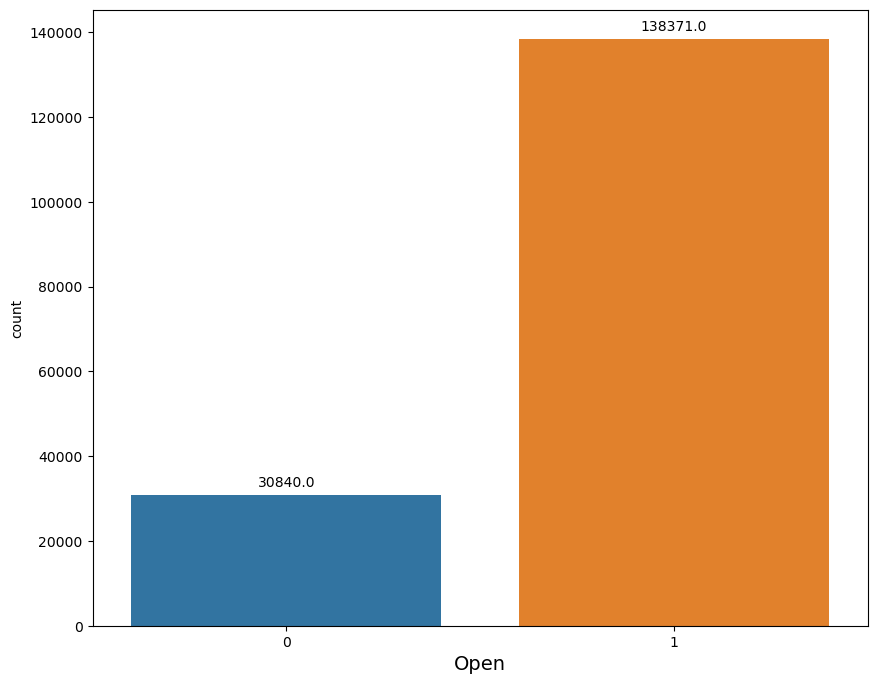

In [16]:
barplt('Open')

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


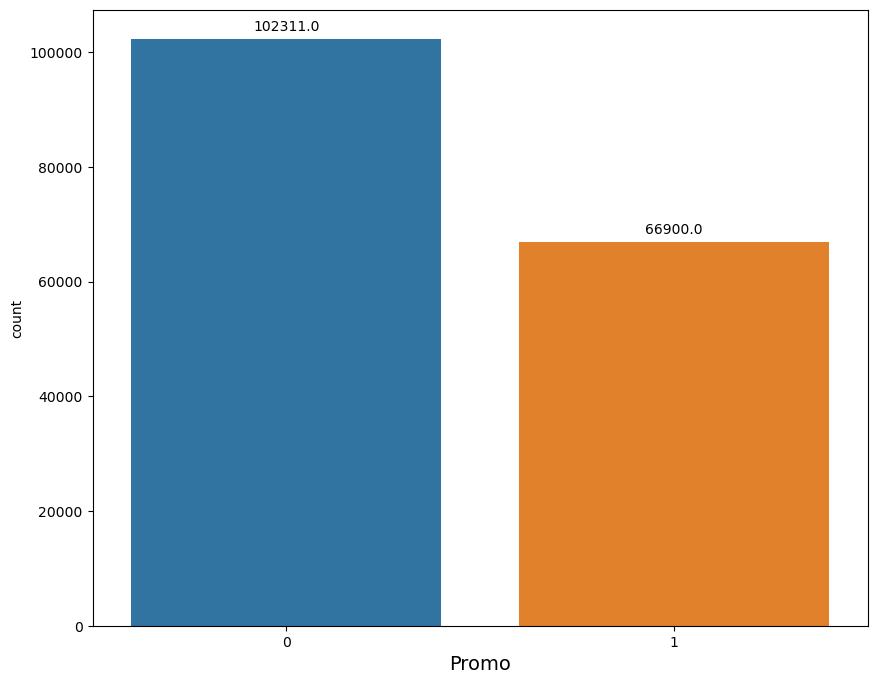

In [17]:
barplt('Promo')

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


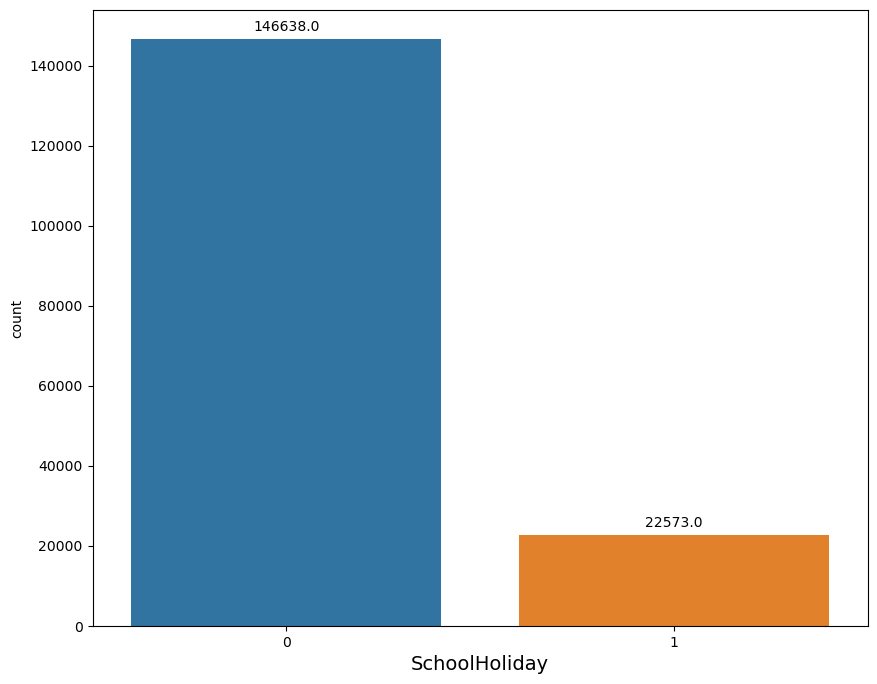

In [18]:
barplt('SchoolHoliday')

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


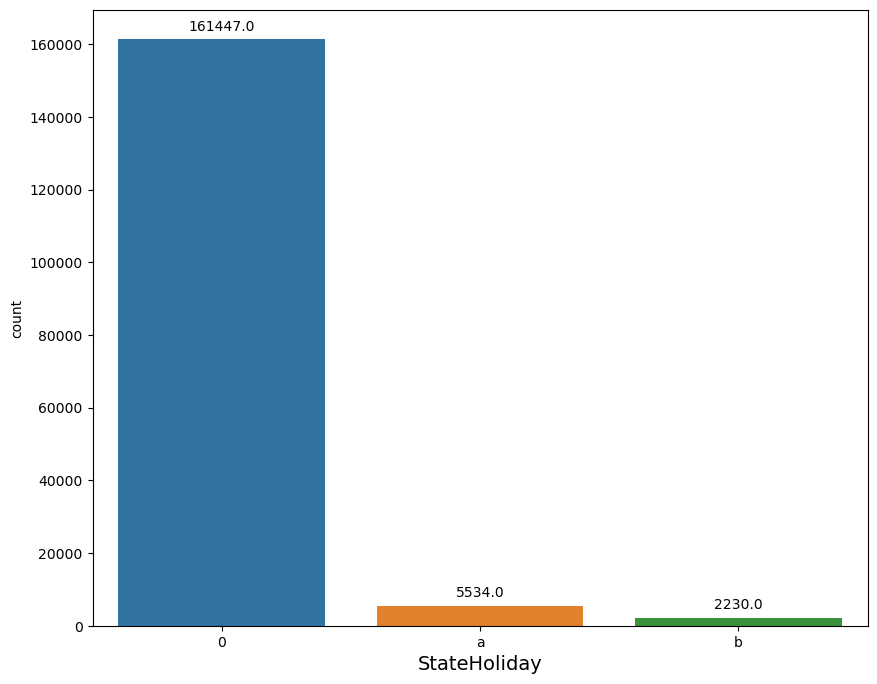

In [19]:
barplt('StateHoliday')


In [20]:
df.dtypes

Product_id                   int64
Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
Open                         int64
Promo                        int64
StateHoliday                object
SchoolHoliday                int64
Petrol_price                 int64
month                        int64
month_name                  object
dtype: object

In [21]:
d_max= df['Date'].max()
d_min =df['Date'].min()
print('Data collection started from ',d_min,' to  ', d_max )

Data collection started from  2016-01-03 00:00:00  to   2016-11-23 00:00:00


In [22]:
print('Type of product is ',df['Product_Category'].nunique())
df['Product_Category'].value_counts()

Type of product is  30


Category_019    76640
Category_005    17831
Category_001    17599
Category_007    12643
Category_021     7890
Category_006     5877
Category_028     4972
Category_015     3672
Category_011     3255
Category_009     3245
Category_024     2987
Category_026     2892
Category_030     2144
Category_023     1314
Category_032     1250
Category_022      965
Category_018      856
Category_003      793
Category_013      521
Category_012      407
Category_033      338
Category_031      332
Category_008      234
Category_010      202
Category_017      142
Category_029      129
Category_020       49
Category_016       19
Category_027        9
Category_014        4
Name: Product_Category, dtype: int64

In [23]:
df.describe()

,Product_id,Order_Demand,Open,Promo,SchoolHoliday,Petrol_price,month
count,1.692110e+05,1.692110e+05,169211.000000,169211.000000,169211.000000,169211.000000,169211.000000
mean,9.528887e+05,5.248118e+03,0.817742,0.395364,0.133401,87.986183,5.927239
std,5.555751e+04,3.116296e+04,0.386058,0.488930,0.340009,4.909978,3.121263
min,6.909430e+05,0.000000e+00,0.000000,0.000000,0.000000,80.000000,1.000000
25%,9.054275e+05,2.000000e+01,1.000000,0.000000,0.000000,84.000000,3.000000
50%,9.526430e+05,3.000000e+02,1.000000,0.000000,0.000000,88.000000,6.000000
75%,1.001416e+06,2.000000e+03,1.000000,1.000000,0.000000,92.000000,9.000000
max,1.048574e+06,2.500000e+06,1.000000,1.000000,1.000000,96.000000,11.000000


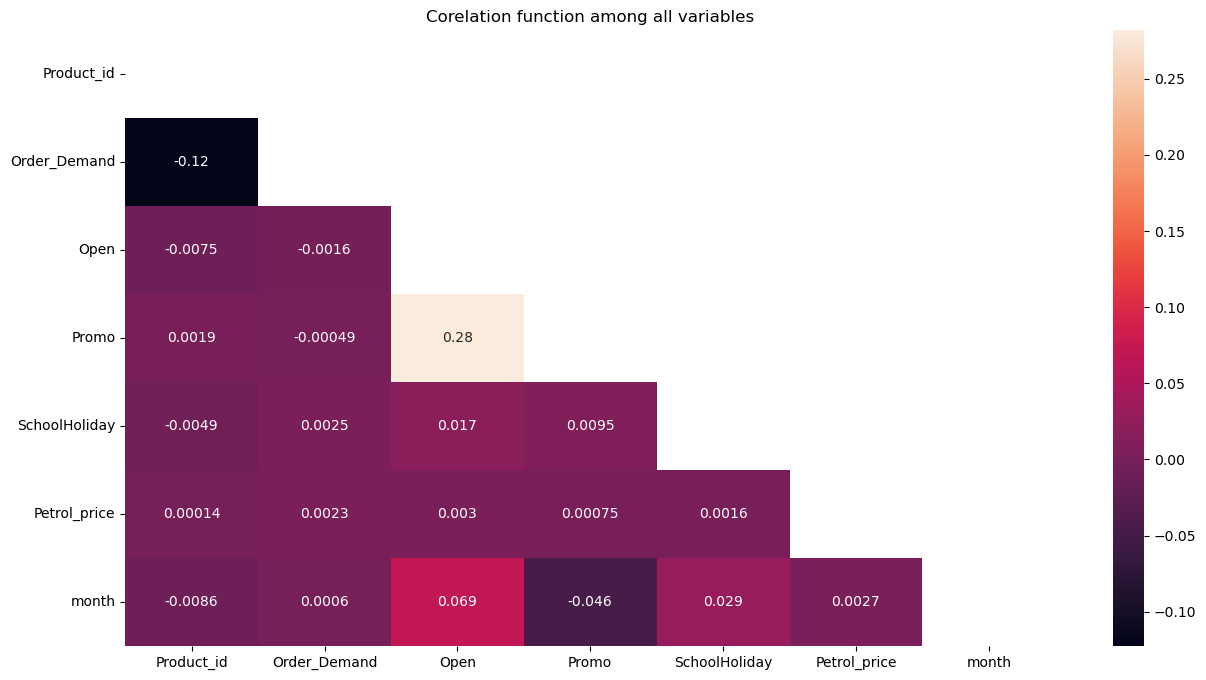

In [25]:
cor =df.corr()
plt.figure(figsize=(15,8))
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor,mask =mask,annot =True)
plt.title('Corelation function among all variables')

plt.show()

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


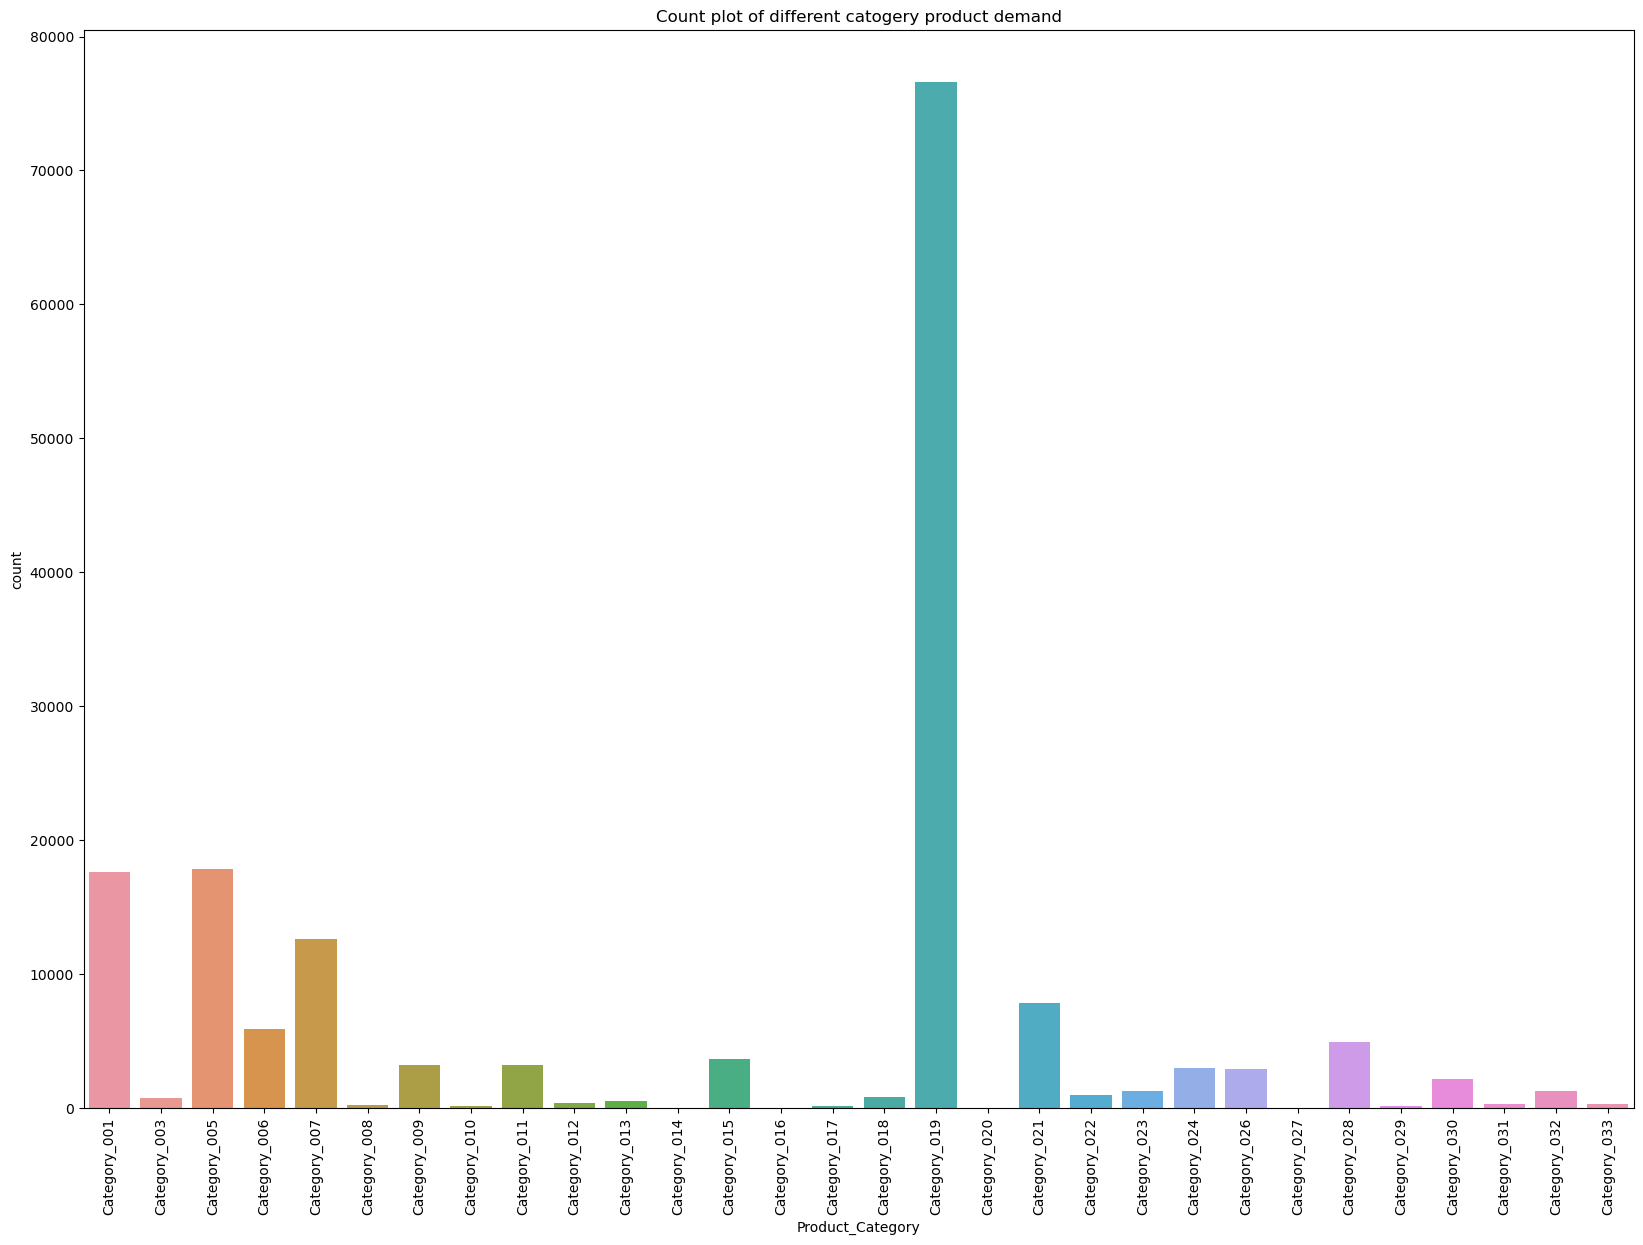

In [26]:
plt.figure(figsize=(20,14))
sns.countplot(df['Product_Category'].sort_values(ascending = True))
plt.xticks(rotation =90)
plt.title('Count plot of different catogery product demand')
plt.show()

In [27]:
time_df = df.groupby('Date')['Order_Demand'].sum().reset_index()

time_df = time_df.set_index('Date')
time_df.head()

,Order_Demand
Date,
2016-01-03,95439
2016-01-04,1974541
2016-01-05,4020468
2016-01-06,4644902
2016-01-07,4272276


In [28]:
#Averages daily sales value for the week, and we are using the start of each month as the timestamp.
y = time_df.Order_Demand.resample('W').mean()
print(np.shape(y))
y.sample(5)

(48,)


Date
2016-02-28    3.280601e+06
2016-03-20    3.964504e+06
2016-09-18    2.194811e+06
2016-06-26    2.652022e+06
2016-05-15    3.743959e+06
Name: Order_Demand, dtype: float64

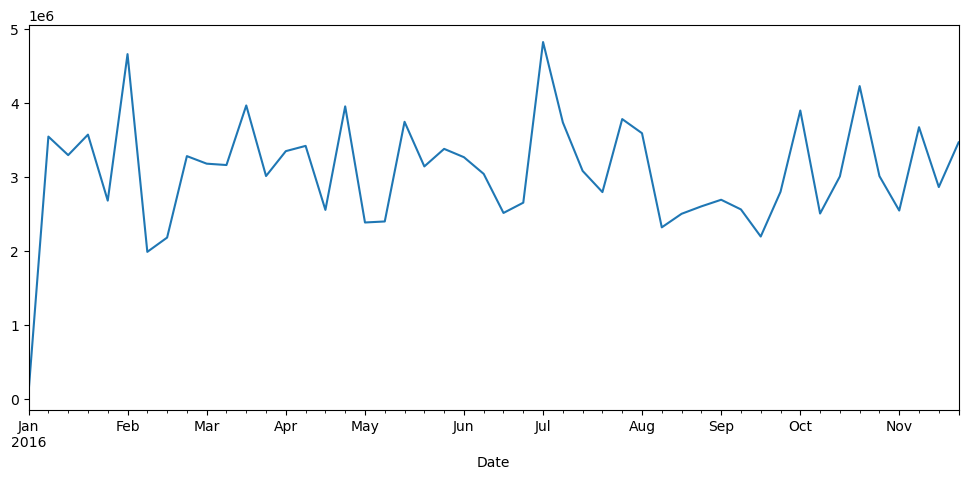

In [29]:
y.plot(figsize=(12,5))
plt.show()

In [30]:
df2 = df[['month', 'Warehouse', 'Order_Demand']].groupby(['month', 'Warehouse'], as_index=False).count()
df2  = df2.pivot(index='month', columns='Warehouse', values='Order_Demand')
df2.head()

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
month,,,,
1,1813,728,11436,538
2,2260,510,12937,423
3,2193,923,13583,583
4,2123,791,11759,550
5,2358,775,10750,604


In [31]:
df_new = df[['month_name', 'Warehouse', 'Order_Demand']].groupby(['month_name', 'Warehouse'], as_index=False).count()
df_new  = df_new.pivot(index='month_name', columns='Warehouse', values='Order_Demand')
df_new.head()

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
month_name,,,,
Apr,2123,791,11759,550
Aug,2392,960,11417,564
Feb,2260,510,12937,423
Jan,1813,728,11436,538
Jul,2094,785,11968,472


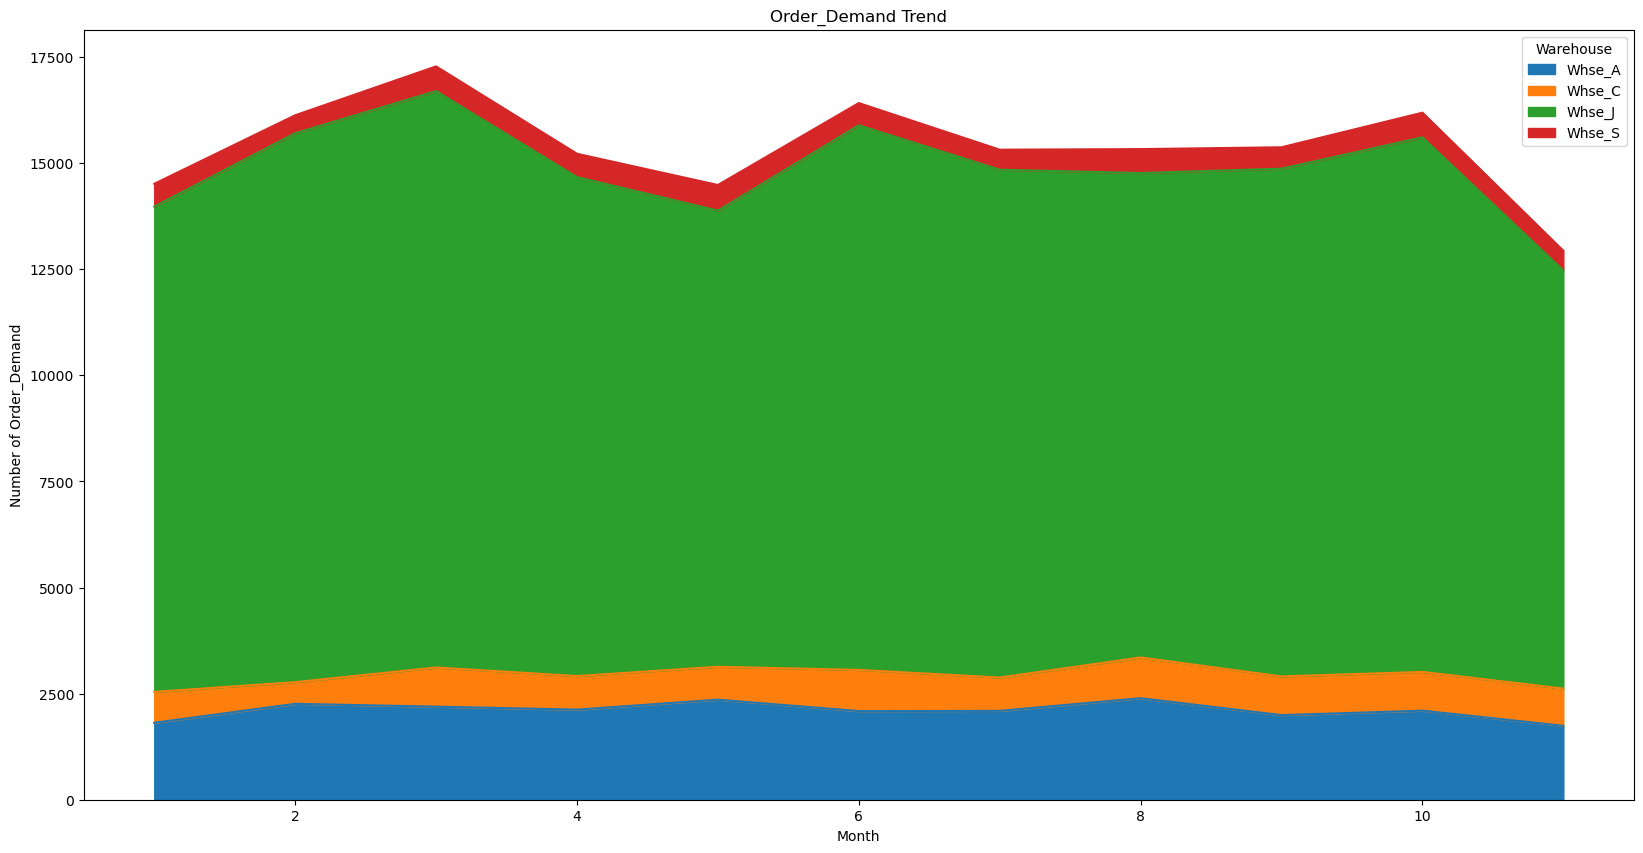

In [32]:
df2.index = df2.index.map(int)
df2.plot(kind='area', figsize=(20, 10))

plt.title('Order_Demand Trend')
plt.ylabel('Number of Order_Demand')
plt.xlabel('Month')
plt.show()

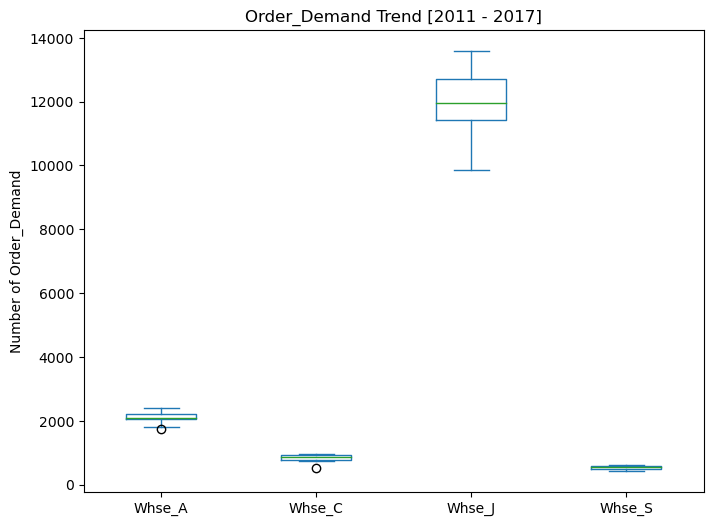

In [33]:
df2[['Whse_A', 'Whse_C', 'Whse_J', 'Whse_S']].plot(kind='box', figsize=(8, 6))

plt.title('Order_Demand Trend [2011 - 2017]')
plt.ylabel('Number of Order_Demand')

plt.show()

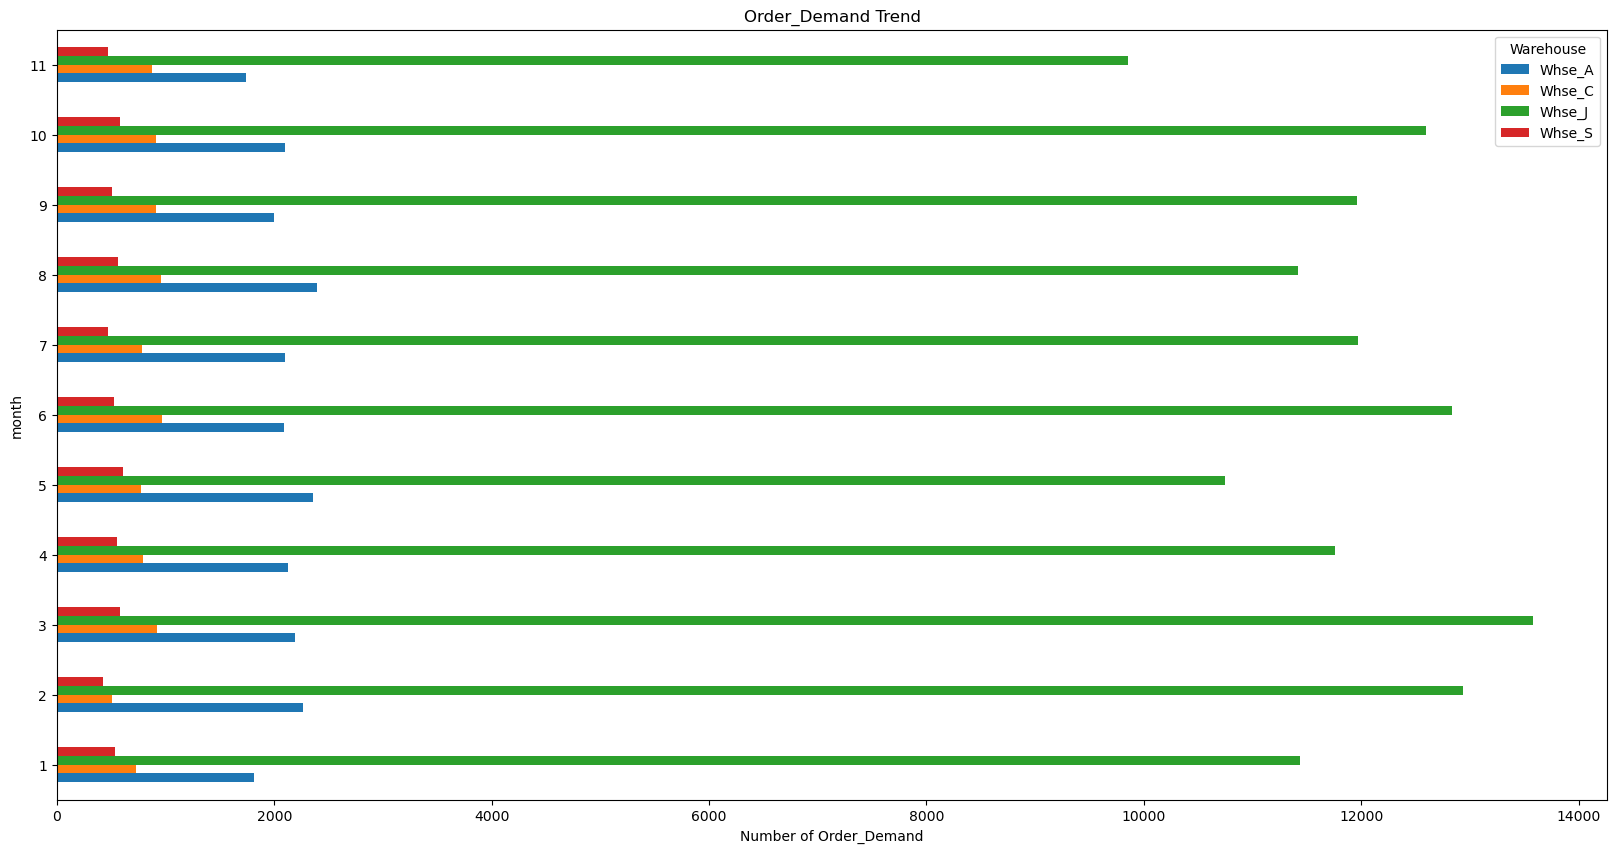

In [34]:
df2.index = df2.index.map(int)
df2.plot(kind='barh', figsize=(20, 10))

plt.title('Order_Demand Trend')
plt.xlabel('Number of Order_Demand')

plt.show()

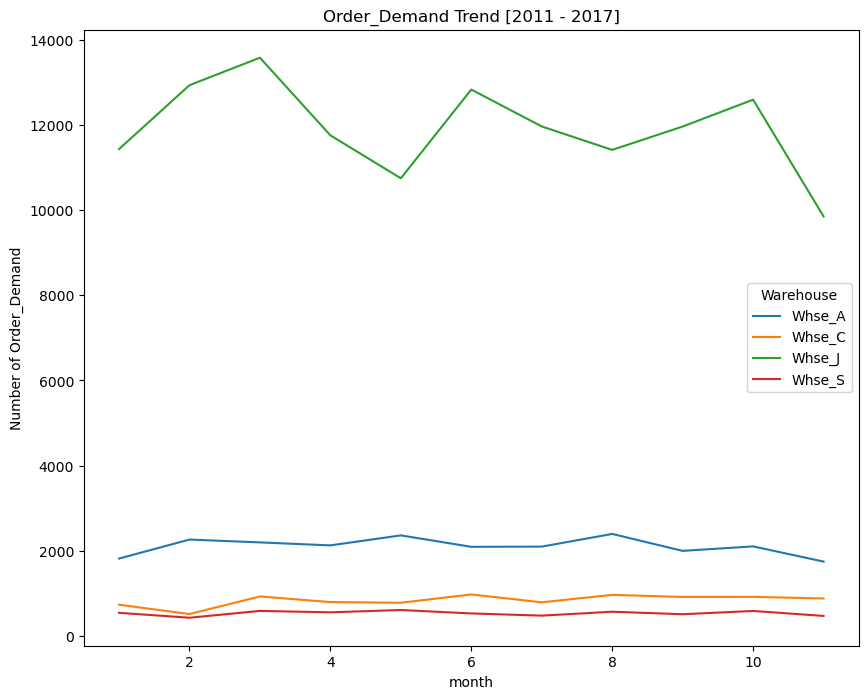

In [35]:
df2[['Whse_A', 'Whse_C', 'Whse_J', 'Whse_S']].plot(kind='line', figsize=(10, 8))

plt.title('Order_Demand Trend [2011 - 2017]')
plt.ylabel('Number of Order_Demand')

plt.show()

In [36]:
df_new['Total'] = df_new.sum(axis=1)

In [37]:
df_new.head()

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S,Total
month_name,,,,,
Apr,2123,791,11759,550,15223
Aug,2392,960,11417,564,15333
Feb,2260,510,12937,423,16130
Jan,1813,728,11436,538,14515
Jul,2094,785,11968,472,15319


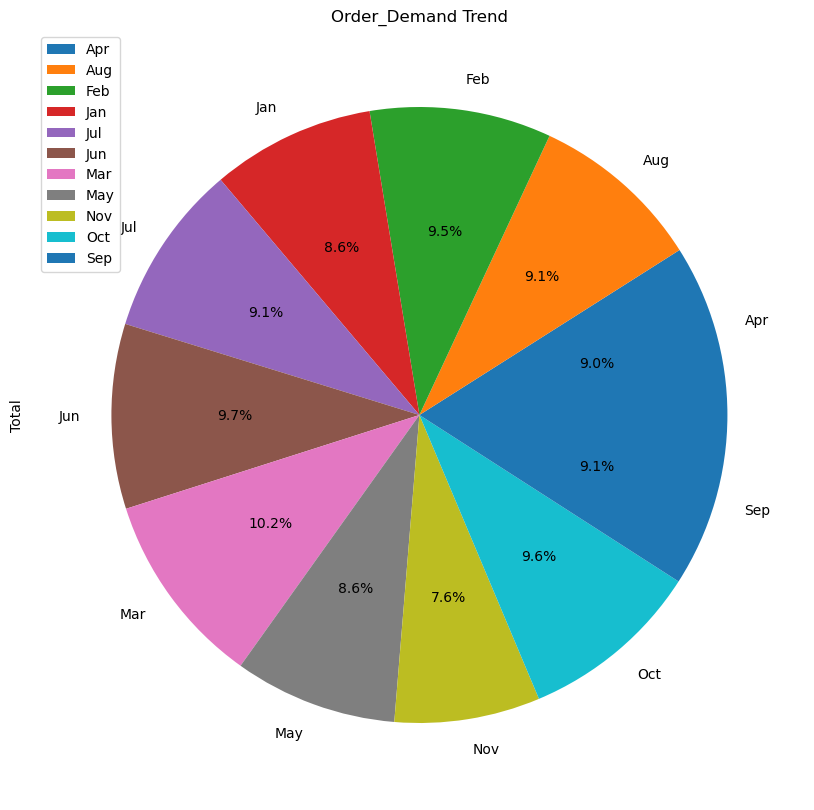

In [38]:
#df2.index = df2.index.map(int)
df_new.plot.pie(y='Total', figsize=(20, 10),
                            autopct='%1.1f%%',               
                            )

plt.title('Order_Demand Trend')
plt.legend(labels=df_new.index)
plt.show()

In [39]:
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,month,month_name
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91,1,Jan
1,786743,Product_1825,Whse_S,Category_006,2016-01-03,50000,1,0,0,0,85,1,Jan
2,786967,Product_0551,Whse_S,Category_030,2016-01-03,3000,1,0,0,0,85,1,Jan
3,786856,Product_0556,Whse_S,Category_030,2016-01-03,1000,1,0,0,0,93,1,Jan
4,899538,Product_1844,Whse_A,Category_018,2016-01-03,7,1,0,0,0,95,1,Jan


In [40]:
df_copy =df.copy()

df_copy['StateHoliday'].replace('a',1,inplace=True)
df_copy['StateHoliday'].replace('b',2,inplace=True)

df_copy.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,month,month_name
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91,1,Jan
1,786743,Product_1825,Whse_S,Category_006,2016-01-03,50000,1,0,0,0,85,1,Jan
2,786967,Product_0551,Whse_S,Category_030,2016-01-03,3000,1,0,0,0,85,1,Jan
3,786856,Product_0556,Whse_S,Category_030,2016-01-03,1000,1,0,0,0,93,1,Jan
4,899538,Product_1844,Whse_A,Category_018,2016-01-03,7,1,0,0,0,95,1,Jan


In [41]:
df_copy.columns

Index(['Product_id', 'Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Petrol_price', 'month', 'month_name'],
      dtype='object')

In [42]:
df_f =df_copy.drop(['Warehouse','month', 'Date','Product_Code','Product_id','Product_Category','month_name'],axis=1)

df_f[['Promo']] = df_f[['Promo']].astype(int)
df_f[['Open']] = df_f[['Open']].astype(int)
df_f[['SchoolHoliday']] = df_f[['SchoolHoliday']].astype(int)
df_f[['StateHoliday']] = df_f[['StateHoliday']].astype(int)
print(df_f.dtypes)
df_f.head(7)

Order_Demand     int64
Open             int32
Promo            int32
StateHoliday     int32
SchoolHoliday    int32
Petrol_price     int64
dtype: object


,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,16000,1,0,0,0,91
1,50000,1,0,0,0,85
2,3000,1,0,0,0,85
3,1000,1,0,0,0,93
4,7,1,0,0,0,95
5,2000,1,0,0,0,80
6,2,1,0,0,0,85


In [43]:
df_f.to_csv('DF_F.csv')

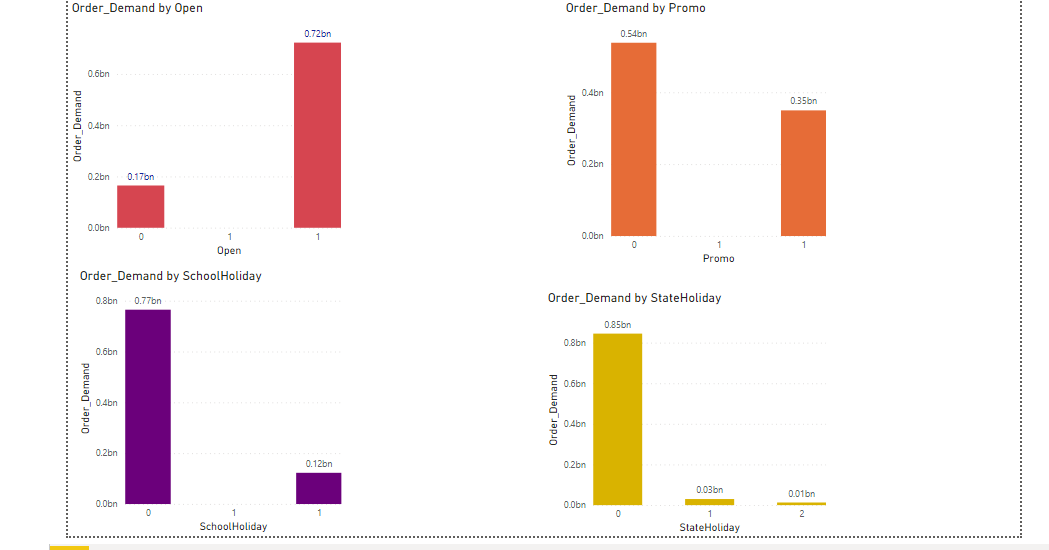

In [53]:
from IPython.display  import Image
import os
Image('image1.png')

In [46]:
df.columns

Index(['Product_id', 'Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Petrol_price', 'month', 'month_name'],
      dtype='object')

In [47]:
df['Product_Category']=df['Product_Category'].sort_values(ascending=False)

In [48]:
df_cat = df[['month', 'Product_Category', 'Order_Demand']].groupby(['month', 'Product_Category'], as_index=False).count()
df_cat  = df_cat.pivot(index='month', columns='Product_Category', values='Order_Demand')
print(np.shape(df_cat))
df_cat.head()

(11, 30)


Product_Category,Category_001,Category_003,Category_005,Category_006,Category_007,Category_008,Category_009,Category_010,Category_011,Category_012,...,Category_023,Category_024,Category_026,Category_027,Category_028,Category_029,Category_030,Category_031,Category_032,Category_033
month,,,,,,,,,,,,,,,,,,,,,
1,1557.0,47.0,1566.0,506.0,1107.0,33.0,209.0,7.0,305.0,43.0,...,90.0,260.0,187.0,2.0,397.0,2.0,155.0,28.0,134.0,30.0
2,1827.0,82.0,1682.0,568.0,1220.0,17.0,310.0,13.0,330.0,27.0,...,146.0,281.0,255.0,NaN,482.0,12.0,153.0,29.0,106.0,28.0
3,1852.0,83.0,1791.0,576.0,1407.0,18.0,305.0,26.0,408.0,31.0,...,107.0,323.0,291.0,1.0,491.0,11.0,210.0,30.0,121.0,35.0
4,1532.0,62.0,1574.0,485.0,1249.0,17.0,299.0,14.0,262.0,34.0,...,95.0,282.0,262.0,NaN,462.0,13.0,144.0,41.0,107.0,33.0
5,1432.0,73.0,1555.0,496.0,1122.0,17.0,302.0,17.0,244.0,53.0,...,110.0,273.0,257.0,1.0,469.0,12.0,172.0,37.0,112.0,29.0


In [49]:
df['Product_Category'].value_counts()

Category_019    76640
Category_005    17831
Category_001    17599
Category_007    12643
Category_021     7890
Category_006     5877
Category_028     4972
Category_015     3672
Category_011     3255
Category_009     3245
Category_024     2987
Category_026     2892
Category_030     2144
Category_023     1314
Category_032     1250
Category_022      965
Category_018      856
Category_003      793
Category_013      521
Category_012      407
Category_033      338
Category_031      332
Category_008      234
Category_010      202
Category_017      142
Category_029      129
Category_020       49
Category_016       19
Category_027        9
Category_014        4
Name: Product_Category, dtype: int64

In [50]:
df_cat = df_cat[['Category_019','Category_005','Category_001','Category_007','Category_021','Category_006']] 

In [51]:
print(np.shape(df_cat))
df_cat.head()

(11, 6)


Product_Category,Category_019,Category_005,Category_001,Category_007,Category_021,Category_006
month,,,,,,
1,6674.0,1566.0,1557.0,1107.0,670.0,506.0
2,7207.0,1682.0,1827.0,1220.0,788.0,568.0
3,7675.0,1791.0,1852.0,1407.0,831.0,576.0
4,6995.0,1574.0,1532.0,1249.0,740.0,485.0
5,6413.0,1555.0,1432.0,1122.0,698.0,496.0


# forecasting

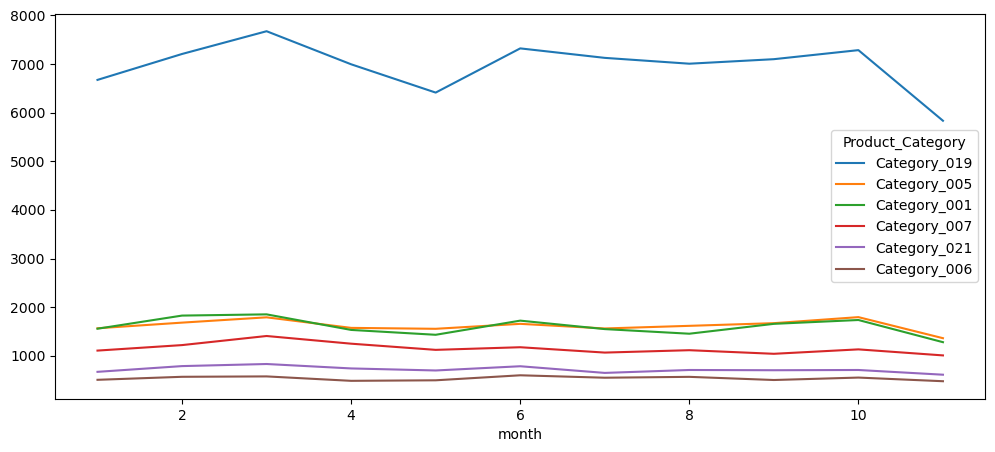

In [52]:
df_cat.plot(figsize=(12,5))
plt.show()